##**Description of the Capstone Project**

**This capstone project organized by devtown aims to evaluate my understanding of  creating a predictive model, Using The heart failure dataset I will create a predictive model with good evaluation metrics that also determines if a patient is likely to have heart failure or not,I will be using the supervised machine learning techniques for this project and I will also be deploying my model using FLASK**

##**Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import (
accuracy_score,
confusion_matrix,
classification_report,
precision_score,
recall_score,
roc_auc_score,
roc_curve,
f1_score)

##**Loading the dataset**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Heart_failure.csv')

In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:

# Checking the shape of our dataset
df.shape

(299, 13)

**The dataset has 299 rows and 13 columns**

In [7]:
df.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


**There are no null coloums or rows in the dataset**

In [8]:
df.duplicated().sum()

np.int64(0)

**There are no duplicates in the dataset**

In [9]:

#Describing our numerical features of our dataset
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


##**Starting model evaluation**

In [10]:
X=df.drop('DEATH_EVENT',axis=1)

In [11]:
#X

In [12]:
y=df['DEATH_EVENT']

In [13]:
y.value_counts()

,count
DEATH_EVENT,
0,203
1,96


**I have noticed imbalance in our label, I will keep that in mind while working in the model**

In [14]:

#Creating an instance of StandardScaler
scaler= StandardScaler()

In [15]:
X=scaler.fit_transform(X)

In [16]:

#Splitting the dataset into test and train
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [17]:
#Checking shapes
X_train.shape

(239, 12)

In [18]:

#Checking shapes
X_test.shape

(60, 12)

##**Model Evaluation**

In [19]:

#Creating an instance of the model
log_model = LogisticRegression(max_iter= 1000, solver= 'saga')

In [20]:

#Fitting the model
log_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, solver='saga')

In [21]:
y_pred= log_model.predict(X_test)

In [22]:
accuracy= accuracy_score(y_test,y_pred)

In [23]:
print(accuracy)

0.8


In [24]:
#Creating an instance of XGboost classifier
xclass_model= XGBClassifier(booster="gblinear")

In [25]:
xclass_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster='gblinear', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [26]:
y_pred=xclass_model.predict(X_test)

In [27]:
accuracy= accuracy_score(y_test,y_pred)

In [28]:
print(accuracy)

0.8


**Hyperparameter Tuning with Logistic Regression algorithm**

**Between Logistic Regression and XGBClassifer, Logistic Regression performed better and will be used to create our model**

In [29]:


params_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

grid_search_log = GridSearchCV(
    estimator=log_model,
    param_grid=params_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

grid_search_log.fit(X_train, y_train)
print("Best Logistic Regression params:", grid_search_log.best_params_)
print("Best accuracy score (LogReg):", grid_search_log.best_score_)

Best Logistic Regression params: {'C': 1, 'penalty': 'l1'}
Best accuracy score (LogReg): 0.8407801418439715


**Accuracy cannot be trusted since there is imbalance in our dataset ,so we will compare our model behavior with other evaluation metrics**

In [30]:
best_model = grid_search_log.best_estimator_

In [31]:
y_pred=best_model.predict(X_test)

In [32]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy}")

Accuracy:0.8166666666666667


In [33]:
print("F1 Score:", f1_score(y_test, y_pred))

F1 Score: 0.7317073170731707


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86        35
           1       0.94      0.60      0.73        25

    accuracy                           0.82        60
   macro avg       0.86      0.79      0.80        60
weighted avg       0.84      0.82      0.81        60



In [35]:
conf_matrix= confusion_matrix(y_test,y_pred)
print(conf_matrix)

[[34  1]
 [10 15]]


<Axes: >

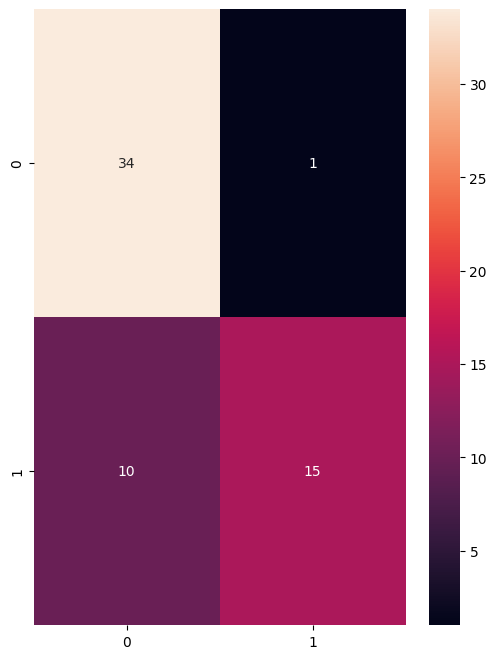

In [36]:

import seaborn as sns
fig= plt.figure(figsize=(6,8))
sns.heatmap(conf_matrix,annot=True)

**From my confusion matrix ,my model has a good balance between the 0's and 1's, It correctly predicted the 0's 34 times out of 35 and  correctly predicted 1's 15 times out of 25**

**Our logistic regression accuracy  is still greater than this so we will be sticking with it**

##**Saving our model**

In [38]:
y_pred= best_model.predict(X_test)

In [39]:
y_pred[54]

np.int64(0)

In [40]:
y_test.iloc[54]

np.int64(0)

In [41]:
import joblib
# Save the best model from GridSearchCV
joblib.dump(best_model, 'best_log_model.pkl')

['best_log_model.pkl']

In [43]:
from google.colab import files

# Download the saved model to your local device
files.download('best_log_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:

# Save the scaler from GridSearchCV
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [45]:
from google.colab import files

# Download the saved model to your local device
files.download('scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>